# SOCIAL NETWORK ANALYSIS

In [4]:
#import needed libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#load data

In [10]:
df=pd.read_csv("social behavior analysis.csv")
df.head()

,User_ID,Connections,Posts_Shared,Likes_Received,Messages_Sent
0,U001,120,35,500,300
1,U002,98,20,400,250
2,U003,200,50,700,450
3,U004,75,15,320,180
4,U005,150,40,620,350


In [15]:
# Select features for clustering
features = df[['Connections', 'Posts_Shared', 'Likes_Received', 'Messages_Sent']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(scaled_features)

# Analyze the clustering results
print("Cluster Labels:")
print(df['Cluster'].value_counts())


Cluster Labels:
Cluster
0    100
Name: count, dtype: int64


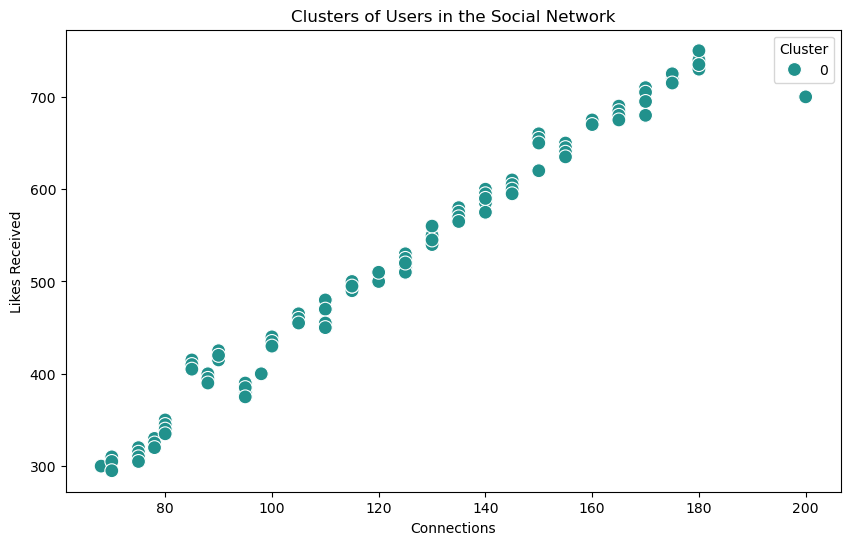

In [19]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Connections',
    y='Likes_Received',
    hue='Cluster',
    palette='viridis',
    data=df,
    s=100
)
plt.title("Clusters of Users in the Social Network")
plt.xlabel("Connections")
plt.ylabel("Likes Received")
plt.legend(title='Cluster', loc='best')
plt.show()